In [ ]:
import gym
from gym import wrappers
import pandas
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter('ignore')

In [ ]:
def render_env(env):
  plt.imshow(env.render(mode='rgb_array'))
  plt.axis('off')
  plt.show()

**FIRST PART OF GAME USING FROZENLAKE-V0 ENVIRONMENT**

Objective of game : Small world with 16 tiles:

          SFFF
          FHFH
          FFFH
          HFFG

Game start with S tile and to get to the goal 'G' tile , no stepping on 'H' tile.

In [ ]:
#BUILDING ENVIRONMENT WITH GYM.MAKE
env = gym.make('FrozenLake-v1') #build a fresh environment.

#START A NEW GAME WITH ENV.RESET()
current_observation = env.reset() #this starts with a new episode and returns the initial observation.

#the current observation is just the current location
print(current_observation)

0


In [ ]:
env.env?

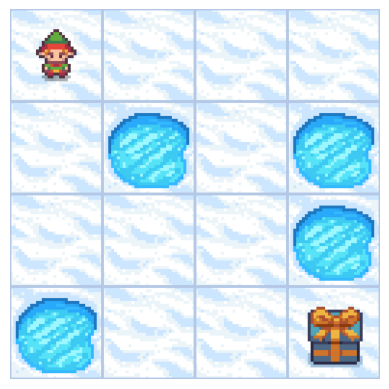

In [ ]:
render_env(env)

In [ ]:
# the action space for this environment includes 4 discrete actions
print(f"our action space : {env.action_space}")
new_action = env.action_space.sample() #randomly chooses one of action
print(f"our new action: {new_action}")

our action space : Discrete(4)
our new action: 3


observation : 1, reward : 0.0, done : False, info :{'prob': 0.3333333333333333}


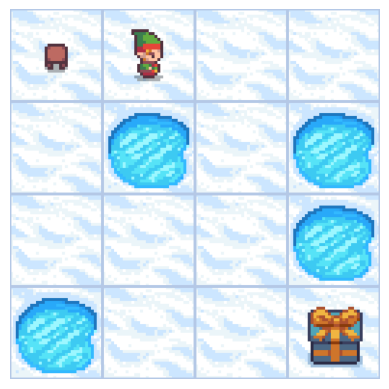

In [ ]:
new_action = env.action_space.sample()

observation, reward, done, info = env.step(new_action)

print(f"observation : {observation}, reward : {reward}, done : {done}, info :{info}")
render_env(env)

Observation : 0, reward: 0.0, done : False, info: {'prob': 0.3333333333333333}


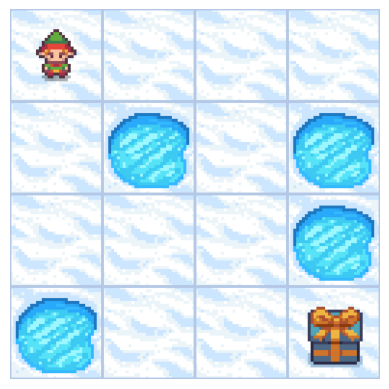

Observation : 0, reward: 0.0, done : False, info: {'prob': 0.3333333333333333}


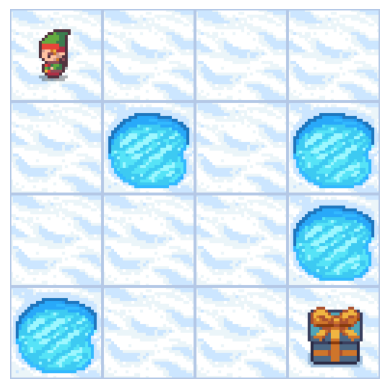

Observation : 1, reward: 0.0, done : False, info: {'prob': 0.3333333333333333}


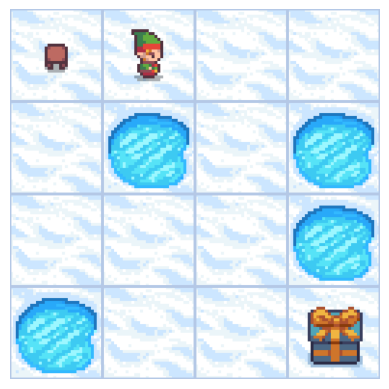

Observation : 2, reward: 0.0, done : False, info: {'prob': 0.3333333333333333}


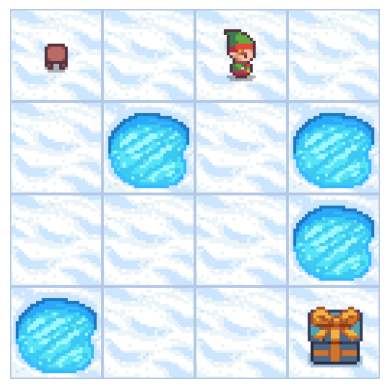

Observation : 3, reward: 0.0, done : False, info: {'prob': 0.3333333333333333}


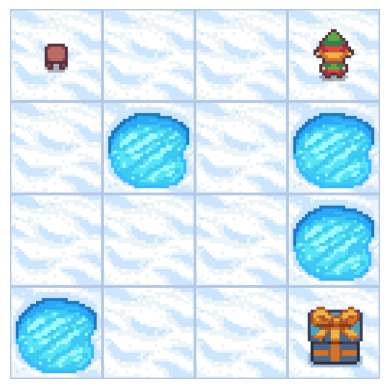

In [ ]:
#lets put this process in continuous fashion

current_observation = env.reset()

for i in range(5):
  new_action = env.action_space.sample() #create random action
  observation, reward, done, info = env.step(new_action)

  #gathering all the data from action
  print(f"Observation : {observation}, reward: {reward}, done : {done}, info: {info}")
  render_env(env)

In [ ]:
#simulatio of whole episode
#rendering every time till it reaches its goal

current_observation = env.reset()
done = False

while not done:
  new_action = env.action_space.sample()
  new_observation, reward, done, info = env.step(new_action)
  print(f"action : {new_action}, observation : {new_observation}, reward : {reward}, done : {done}, info : {info}")

action : 2, observation : 0, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 2, observation : 1, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 2, observation : 1, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 0, observation : 0, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 0, observation : 0, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 0, observation : 0, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 3, observation : 1, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 2, observation : 1, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 2, observation : 2, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 3, observation : 2, reward : 0.0, done : False, info : {'prob': 0.3333333333333333}
action : 3, observation : 3, reward : 0.0, done : False, info : {'prob

In [ ]:
#GATHERING DATA FOR FURTHER TRAINING\PROCESSING
import numpy as np

env = gym.make('FrozenLake-v1')

num_episodes = 40000

life_memory = []
for i in range(num_episodes):

  #starting new episodes and recodring all that memories
  old_observation = env.reset()
  done = False
  tot_reward = 0
  ep_memory = []
  while not done:
    new_action = env.action_space.sample()
    observation, reward, done, info = env.step(new_action)
    tot_reward += reward

    ep_memory.append({
        'observation' : old_observation,
        'action' : new_action,
        'reward' : reward,
        'episode' : i,
    })
    old_observation = observation


  #incorporate total_reward
  num_steps = len(ep_memory)
  for i,ep_mem in enumerate(ep_memory):
    ep_mem['tot_reward'] = tot_reward
    ep_mem['decay_reward'] = i*tot_reward/num_steps

  life_memory.extend(ep_memory)

memory_df = pandas.DataFrame(life_memory)



In [ ]:
memory_df

,observation,action,reward,episode,tot_reward,decay_reward
0,0,1,0.0,0,0.0,0.0
1,4,2,0.0,0,0.0,0.0
2,8,0,0.0,0,0.0,0.0
3,4,0,0.0,0,0.0,0.0
4,4,2,0.0,0,0.0,0.0
...,...,...,...,...,...,...
308522,1,1,0.0,39999,0.0,0.0
308523,0,2,0.0,39999,0.0,0.0
308524,1,0,0.0,39999,0.0,0.0
308525,1,3,0.0,39999,0.0,0.0


import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['observation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['action'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['reward'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['episode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['observation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['action'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['reward'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['episode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6306744070201986566, *[[['observation', 'action'], ['action', 'reward'], ['reward', 'episode'], ['episode', 'tot_reward']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'observation', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'action', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'reward', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'tot_reward', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['observation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['action'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['reward'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6306744070201986566, *['episode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['observation'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['action'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['reward'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6306744070201986566, *['episode'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6306744070201986566, *[[['observation', 'action'], ['action', 'reward'], ['reward', 'episode'], ['episode', 'tot_reward']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'observation', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'action', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'reward', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6306744070201986566 = autoviz.get_registered_df('df_6306744070201986566')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6306744070201986566, *['episode', 'tot_reward', None], **{})
chart

In [ ]:
memory_df.describe()

,observation,action,reward,episode,tot_reward,decay_reward
count,308527.000000,308527.000000,308527.000000,308527.000000,308527.000000,308527.000000
mean,2.224123,1.501350,0.001737,20022.633325,0.022714,0.010489
std,2.989772,1.118665,0.041645,11557.314169,0.148992,0.081355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,10006.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,20108.000000,0.000000,0.000000
75%,4.000000,3.000000,0.000000,30039.000000,0.000000,0.000000
max,14.000000,3.000000,1.000000,39999.000000,1.000000,0.981818


In [ ]:
np.mean(memory_df.groupby('episode').reward.sum())

0.0134

In [ ]:
#so success rate with randomisation process is just 1.34%
#here is why RL models are used

#Using supervised models to leaverage from data gathered and predict outcomes

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

model = ExtraTreesRegressor(n_estimators = 50)
#model = SVR()
y = 0.5*memory_df.reward + 0.1*memory_df.decay_reward + memory_df.tot_reward
x = memory_df[['observation' , 'action']]
model.fit(x,y)


ExtraTreesRegressor(n_estimators=50)

In [ ]:
model1 = RandomForestRegressor()
y = 1*memory_df.reward + memory_df.tot_reward + 0.1*memory_df.decay_reward
x = memory_df[['observation' , 'action']]
model1.fit(x,y)

num_episodes = 500

life_memory = []
for i in range(num_episodes):

  #starting new episodes and record all its memory
  old_observation = env.reset()
  done = False
  tot_reward = 0
  ep_memory = []
  while not done:

    pred_in = [[old_observation, i] for i in range(4)]
    new_action = np.argmax(model1.predict(pred_in))
    observation, reward, done, info = env.step(new_action)
    tot_reward += reward

    ep_memory.append({
        'observation' : old_observation,
        'action' : new_action,
        'reward' : reward,
        'episode' : i,
    })
    old_observation = observation

    #incorporate total reward
    for ep_mem in ep_memory:
      ep_mem['tot_reward'] = tot_reward

    life_memory.extend(ep_memory)

memory_df2 = pandas.DataFrame(life_memory)

np.mean(memory_df2.groupby('episode').reward.sum())


0.664

In [ ]:
#we got a very huge boost in performance i.e from 1.3% to straight 66.4%
#lets extend this for other models

num_episodes = 500

life_memory = []
for i in range(num_episodes):

  #starting new episodes and record all its memory
  old_observation = env.reset()
  done = False
  tot_reward = 0
  ep_memory = []
  while not done:

    pred_in = [[old_observation, i] for i in range(4)]
    new_action = np.argmax(model.predict(pred_in))
    observation, reward, done, info = env.step(new_action)
    tot_reward += reward

    ep_memory.append({
        'observation' : old_observation,
        'action' : new_action,
        'reward' : reward,
        'episode' : i,
    })
    old_observation = observation

    #incorporate total reward
    for ep_mem in ep_memory:
      ep_mem['tot_reward'] = tot_reward

    life_memory.extend(ep_memory)

memory_df3 = pandas.DataFrame(life_memory)

np.mean(memory_df3.groupby('episode').reward.sum())


0.636

In [ ]:
#here too performace has exceeded but similar as for ExtraTreesRegressor
#but with randomisation and intelligence combined like in
#ExtraTreesRegressor as compared to Regular treeregressor.

env = gym.make('CartPole-v0')
env.env?

In [ ]:
num_episodes = 1000

life_memory = []
for i in range(num_episodes):

  #recording all memories
  old_observation = env.reset()
  done = False
  tot_reward = 0
  ep_memory = []
  while not done:
    new_action = env.action_space.sample()
    observation, reward, done, info = env.step(new_action)
    tot_reward +=reward

    ep_memory.append({
        'obs0' : old_observation[0],
        'obs1' : old_observation[1],
        'obs2' : old_observation[2],
        'obs3' : old_observation[3],
        'action' : new_action,
        'reward' : reward,
        'episode' : i,
    })

    old_observation = observation

    #incorporate total model
    for ep_mem in ep_memory:
      ep_mem['tot_reward'] = tot_reward

    life_memory.extend(ep_memory)

memory_df = pandas.DataFrame(life_memory)

np.mean(memory_df.groupby('episode').reward.sum())


338.006

In [ ]:
memory_df

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward
0,-0.026372,0.045055,-0.033622,0.006054,1,1.0,0,13.0
1,-0.026372,0.045055,-0.033622,0.006054,1,1.0,0,13.0
2,-0.025471,0.240642,-0.033501,-0.297045,0,1.0,0,13.0
3,-0.026372,0.045055,-0.033622,0.006054,1,1.0,0,13.0
4,-0.025471,0.240642,-0.033501,-0.297045,0,1.0,0,13.0
...,...,...,...,...,...,...,...,...
338001,-0.011452,0.366982,-0.102160,-0.779011,1,1.0,999,13.0
338002,-0.004112,0.563349,-0.117740,-1.102009,1,1.0,999,13.0
338003,0.007155,0.759806,-0.139781,-1.429190,1,1.0,999,13.0
338004,0.022351,0.956350,-0.168364,-1.762092,0,1.0,999,13.0


In [ ]:
memory_df.describe()

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward
count,338006.000000,338006.000000,338006.000000,338006.000000,338006.000000,338006.0,338006.000000,338006.000000
mean,0.004813,0.001422,0.001626,0.007233,0.498888,1.0,505.321145,38.827962
std,0.068332,0.390118,0.062834,0.529845,0.500000,0.0,302.840272,21.924062
min,-0.638071,-2.281545,-0.209400,-2.774365,0.000000,1.0,0.000000,8.000000
25%,-0.029645,-0.209998,-0.035329,-0.306266,0.000000,1.0,259.000000,23.000000
50%,0.005284,0.001795,0.002217,0.001550,0.000000,1.0,505.000000,34.000000
75%,0.034915,0.212855,0.038784,0.312694,1.000000,1.0,777.000000,49.000000
max,0.945861,2.502229,0.209424,3.034001,1.000000,1.0,999.000000,102.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators = 50)

memory_df['comb_reward'] = 0.5*memory_df.reward + memory_df.tot_reward
model.fit(memory_df[['obs0' , 'obs1' , 'obs2' , 'obs3' , 'action']], memory_df.comb_reward)

ExtraTreesRegressor(n_estimators=50)

In [ ]:
num_episodes = 500

life_memory = []
for i in range(num_episodes):

  #starting new episodes and record all its memory
  old_observation = env.reset()
  done = False
  tot_reward = 0
  ep_memory = []
  while not done:

    pred_in = [list(old_observation) + [i] for i in range(2)]
    new_action = np.argmax(model.predict(pred_in))
    observation, reward, done, info = env.step(new_action)
    tot_reward += reward

    ep_memory.append({
        'obs0' : old_observation[0],
        'obs1' : old_observation[1],
        'obs2' : old_observation[2],
        'obs3' : old_observation[3],
        'action' : new_action,
        'reward' : reward,
        'episode' : i,
    })
    old_observation = observation

    #incorporate total reward
    for ep_mem in ep_memory:
      ep_mem['tot_reward'] = tot_reward

    life_memory.extend(ep_memory)

memory_df = pandas.DataFrame(life_memory)

np.mean(memory_df.groupby('episode').reward.sum())


10167.148

In [ ]:
memory_df[memory_df.tot_reward == memory_df.tot_reward.max()]

,obs0,obs1,obs2,obs3,action,reward,episode,tot_reward
19603,0.009336,0.045024,0.004019,-0.013257,1,1.0,3,200.0
19604,0.009336,0.045024,0.004019,-0.013257,1,1.0,3,200.0
19605,0.010236,0.240089,0.003754,-0.304669,0,1.0,3,200.0
19606,0.009336,0.045024,0.004019,-0.013257,1,1.0,3,200.0
19607,0.010236,0.240089,0.003754,-0.304669,0,1.0,3,200.0
...,...,...,...,...,...,...,...,...
5052195,-0.396546,-0.109628,-0.046179,-0.590622,1,1.0,496,200.0
5052196,-0.398738,0.086109,-0.057991,-0.897486,0,1.0,496,200.0
5052197,-0.397016,-0.108181,-0.075941,-0.623581,0,1.0,496,200.0
5052198,-0.399180,-0.302165,-0.088413,-0.355748,0,1.0,496,200.0
